# Машинное обучение, ВМК МГУ

## Практическое задание 1. Метод опорных векторов и аппроксимация ядер

### Общая информация
Дата выдачи: 23:59 MSK 05.03.2021

Мягкий дедлайн: 23:59MSK 19.03.2021 **(за каждый день просрочки снимается 1 балл)**

Жесткий дедлайн: 23:59MSK 26.03.2021

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимальная оценка за работу (без учёта бонусов) — **10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
   * Ноутбук homework-practice-01-random-features-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    

### О задании

На занятиях мы подробно обсуждали метод опорных векторов (SVM). В базовой версии в нём нет чего-то особенного — мы всего лишь используем специальную функцию потерь, которая не требует устремлять отступы к бесконечности; ей достаточно, чтобы отступы были не меньше +1. Затем мы узнали, что SVM можно переписать в двойственном виде, который, позволяет заменить скалярные произведения объектов на ядра. Это будет соответствовать построению модели в новом пространстве более высокой размерности, координаты которого представляют собой нелинейные модификации исходных признаков.

Ядровой SVM, к сожалению, довольно затратен по памяти (нужно хранить матрицу Грама размера $d \times d$) и по времени (нужно решать задачу условной оптимизации с квадратичной функцией, а это не очень быстро). Мы обсуждали, что есть способы посчитать новые признаки $\tilde \varphi(x)$ на основе исходных так, что скалярные произведения этих новых $\langle \tilde \varphi(x), \tilde \varphi(z) \rangle$ приближают ядро $K(x, z)$.

Мы будем исследовать аппроксимации методом Random Fourier Features (RFF, также в литературе встречается название Random Kitchen Sinks) для гауссовых ядер. Будем использовать формулы, которые немного отличаются от того, что было на лекциях (мы добавим сдвиги внутрь тригонометрических функций и будем использовать только косинусы, потому что с нужным сдвигом косинус превратится в синус):
$$\tilde \varphi(x) = (
\cos (w_1^T x + b_1),
\dots,
\cos (w_n^T x + b_n)
),$$
где $w_j \sim \mathcal{N}(0, 1/\sigma^2)$, $b_j \sim U[-\pi, \pi]$.

На новых признаках $\tilde \varphi(x)$ мы будем строить любую линейную модель.

Можно считать, что это некоторая новая парадигма построения сложных моделей. Можно направленно искать сложные нелинейные закономерности в данных с помощью градиентного бустинга или нейронных сетей, а можно просто нагенерировать большое количество случайных нелинейных признаков и надеяться, что быстрая и простая модель (то есть линейная) сможет показать на них хорошее качество. В этом задании мы изучим, насколько работоспособна такая идея.

### Алгоритм

Вам потребуется реализовать следующий алгоритм:
1. Понизить размерность выборки до new_dim с помощью метода главных компонент.

2. Для полученной выборки оценить гиперпараметр $\sigma^2$ с помощью эвристики (рекомендуем считать медиану не по всем парам объектов, а по случайному подмножеству из где-то миллиона пар объектов): $$\sigma^2 = \text{median}_{i, j = 1, \dots, \ell, i \neq j} \left\{\sum_{k = 1}^{d} (x_{ik} - x_{jk})^2 \right\}$$
**Замечание:** обратите внимание на  $i \neq j$, без этого оценка медианы может быть смещена, а также без этого будут сниматься баллы.

3. Сгенерировать n_features наборов весов $w_j$ и сдвигов $b_j$.

4. Сформировать n_features новых признаков по формулам, приведённым выше.

5. Обучить линейную модель (логистическую регрессию или SVM) на новых признаках.

6. Повторить преобразования (PCA, формирование новых признаков) к тестовой выборке и применить модель.

Тестировать алгоритм мы будем на данных Fashion MNIST. Ниже код для их загрузки и подготовки.

In [1]:
# Attention! Кажется, под python3.9 импортнуть керас будет трудно (стабильный тензорфлоу requires Python 3.5–3.8, pip and venv >= 19.0)
import keras
from keras.datasets import fashion_mnist
(x_train_pics, y_train), (x_test_pics, y_test) = fashion_mnist.load_data()
x_train = x_train_pics.reshape(x_train_pics.shape[0], -1)
x_test = x_test_pics.reshape(x_test_pics.shape[0], -1)

**ВАЖНОЕ ЗАМЕЧАНИЕ:**

Датасет по умолчанию хранится в типе 'uint8', вследствие чего при ручном подсчете дисперсии переменные переполняются и вы получаете неадекватные результаты. Бороться с этим можно преобразованием исходных данных к типу 'float'. Еще один хороший вариант &ndash; использовать специализированные функции из библиотек numpy / scipy и, в частности, **scipy.spatial.distance_matrix**.

Ниже приводим подтверждающий пример.

In [2]:
import numpy as np

indices = np.random.choice(x_train.shape[0], size=2000)
print(np.median(np.sum((x_train[indices[:1000]].astype(float) - x_train[indices[1000:]]).astype(float) ** 2, axis=1)))

print(np.median(np.sum((x_train[indices[:1000]] - x_train[indices[1000:]]) ** 2, axis=1)))

8557199.0
53972.0


__Задание 1. (5 баллов)__

**А) (4 балла)** Реализуйте алгоритм, описанный выше. Можете воспользоваться шаблоном класса ниже или написать свой интерфейс.

Ваша реализация должна поддерживать следующие опции:
1. Возможность задавать значения параметров new_dim (по умолчанию 50) и n_features (по умолчанию 1000).
2. Возможность включать или выключать предварительное понижение размерности с помощью метода главных компонент.
3. Возможность выбирать тип линейной модели (логистическая регрессия или SVM с линейным ядром).


**Важно! За несоответствия будут сниматься баллы:**
* Так как мы работаем с линейными моделями, вам необходимо делать нормализацию данных.
* Оценка гиперпраметра распределения и построение нового датасета должны быть без питоновских циклов (можно все запрограммировать векторно, используя numpy)

**Б) (1 балл)** Протестируйте на данных Fashion MNIST, сформированных кодом выше. Если на тесте у вас получилась доля верных ответов **не ниже 0.84 с параметрами по умолчанию**, то вы всё сделали правильно.

**Подсказка**
* Использование метода без PCA и без нормализации признаков перед генерацией весов может дать неожиданные результаты. Сами подумайте, почему так может происходить :)

Для начала подключим всё необходимое.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.spatial.distance import pdist
from sklearn.preprocessing import Normalizer, normalize

from lightgbm import LGBMClassifier

from joblib import Parallel, delayed
import multiprocessing

Дополнительно форматируем выводы таблиц.

In [4]:
pd.set_option('max_columns', 10)
pd.set_option('display.float_format', '{:.3f}'.format)

In [5]:
def stat(X):
    """
    Статистика для входных данных
    Параметры:
        X - входные данные

    Результат:
        pd.DataFrame со статистическими данными по значениям входа 
        (среднее, дисперсия и проч.)
    """
    stats = pd.DataFrame(index=['min', 'max', 'mean', 'var'], columns = range(X.shape[1]))
    stats.loc['min'] = X.min(axis=0)
    stats.loc['max'] = X.max(axis=0)
    stats.loc['mean'] = X.mean(axis=0)
    stats.loc['var'] = X.var(axis=0)
    info = [stats.loc['min'].max(),
            stats.loc['max'].min(),
            stats.loc['mean'].max(),
            stats.loc['var'].max()]
    stats['info'] = info
    return stats

In [6]:
def show_image(X, y):
    """
    Демонстрация нескольких случайных изображений из датасета
    Параметры:
        X, y - входные данные
    """
    f = plt.figure(figsize=(4, 5))
    f.suptitle(f'Several images from dataset')

    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(X[i].reshape(28,28)) #plot the datat
        plt.title(y[i])
        plt.xticks([])
        plt.yticks([])

In [7]:
def show_image_target(X, y, n):
    """
    Демонстрация нескольких изображений из датасета
    с конкретными значениями целевой переменной.
    Параметры:
        X, y - входные данные
        n - желаемый класс
    """
    f = plt.figure(figsize=(4, 4))
    f.suptitle(f'Several images from dataset with class = {n}')
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(X[y==n][i].reshape(28,28)) #plot the data
        plt.xticks([])
        plt.yticks([])

    plt.show()

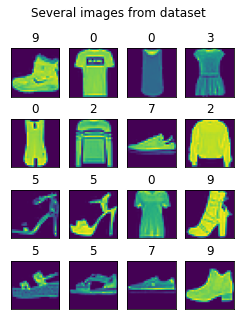

In [8]:
show_image(x_train, y_train)

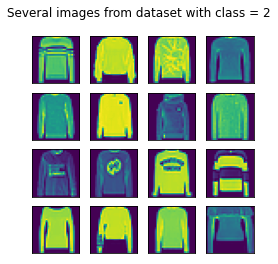

In [9]:
show_image_target(x_train, y_train, 2)

Чтобы красиво реализовать класс RFFPipeline с помощью внутреннего pipeline, сначала определим модуль преобразования:
$$\tilde \varphi(x) = (
\cos (w_1^T x + b_1),
\dots,
\cos (w_n^T x + b_n)
),$$
где $w_j \sim \mathcal{N}(0, 1/\sigma^2)$, $b_j \sim U[-\pi, \pi]$.

In [10]:
class Fourier(BaseEstimator, TransformerMixin):
    """
    Отдельный модуль для преобразования данных. 
    Выполняет сначала линейное преобразование с матрицей весов W и сдвигов b, 
    после чего применяет тригонометрическую функцию (cos) для RFF.
    Параметры:
        new_dim - размерность, до которой понижается исходное признаковое пр-во
        n_features - итоговая размерность пр-ва, полученная 
        линейно-тригонометрическими преобразованиями 
    """
    def __init__(self, new_dim=1000, n_features=50):
        self.new_dim = new_dim
        self.n_features = n_features

    def transform(self, X):
        return np.cos(X.dot(self.W) + self.b)

    def fit(self, X, y):
        indeces = np.random.randint(X.shape[0], size=1000)
        sub_X = X[indeces]
        dist = pdist(sub_X)
        self.sigma_2 = np.median(dist, axis=0)
        self.W = np.random.randn(self.new_dim, self.n_features) / self.sigma_2
        self.b = np.random.uniform(-np.pi, np.pi, self.n_features)
        return self

Непосредственно соединяет модули преобразований и классификатора в pipeline.
В классе реализовано больше двух линейных функций: это необходимо, чтобы в следующем задании удобно провести сравнения. Это только лишь расширяет функционал, позволяя моделировать большее разнообразие классификаторов. Однако исходные требования 1-3 соблюдены.
Можно было провести сравнения, моделируя недостающие классификаторы самостоятельно, но мне хотелось обойтись одним классом. 

In [11]:
class RFFPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, n_features=1000, new_dim=50, 
                 use_PCA=True, use_F=True, 
                 classifier='logreg', n_estimators=100, learning_rate=0.1):
        """        
        Implements pipeline, which consists of PCA decomposition,
        Random Fourier Features approximation and linear classification model.
        
        n_features, int: amount of synthetic random features generated with RFF approximation.

        new_dim, int: PCA output size.
        
        use_PCA, bool: whether to include PCA preprocessing.
        
        classifier, string: either 'svm' or 'logreg', a linear classification model to use on top of pipeline.
        
        Feel free to edit this template for your preferences.  

        """
        self.n_features = n_features
        self.use_PCA = use_PCA
        self.use_F = use_F
        self.new_dim = new_dim
        self.classifier = classifier
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        """
        Fit all parts of algorithm (PCA, RFF, Classification) to training set.
        """
        self.pipe = Pipeline([('stdscaler_1', StandardScaler())])

        if self.use_PCA:
            self.pipe.steps.append(('pca', PCA(n_components=self.new_dim)))
        
        if self.use_F:
            self.pipe.steps.append(('stdscaler_2', StandardScaler()))

            if self.use_PCA:
                self.pipe.steps.append(('fourier', Fourier(self.new_dim, self.n_features)))
            else:
                self.pipe.steps.append(('fourier', Fourier(X.shape[1], self.n_features)))
                
        self.pipe.steps.append(('stdscaler_3', StandardScaler()))
        
        if self.classifier == 'logreg':
            self.pipe.steps.append(('logreg', LogisticRegression(n_jobs=-1)))

        if self.classifier == 'svm_linear':
            self.pipe.steps.append(('svm_linear', SVC(kernel='linear')))
        
        if self.classifier == 'svm_kernel':
            self.pipe.steps.append(('svm_kernel', SVC(kernel='rbf')))

        if self.classifier == 'lgbm':
            self.pipe.steps.append(('lgbm', LGBMClassifier(n_estimators=self.n_estimators,
                                                           learning_rate=self.learning_rate,
                                                           n_jobs=-1)))
        self.pipe.fit(X, y)
        return self

    def predict_proba(self, X):
        """
        Apply pipeline to obtain scores for input data.
        """
        return self.pipe.predict(X)       
        
    def predict(self, X):
        """
        Apply pipeline to obtain discrete predictions for input data.
        """
        return self.pipe.predict(X) 

Обучение и применение модели к тестовой воборке.

In [12]:
np.set_printoptions(suppress=True)

In [13]:
%%time
clf = RFFPipeline()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

Accuracy: 0.862
CPU times: user 38.8 s, sys: 25.8 s, total: 1min 4s
Wall time: 23.5 s


Можно заметить, что точность соответствует требованиям. Таким обазом, реализованный класс преобразования признаков работает хорошо.

__Задание 2. (3 балла)__

_Сравните следующие подходы: **(2.5 балла)**_

* Подход со случайными признаками vs обучение линейного SVM на исходных признаках.
* Подход со случайными признаками vs обучение ядрового SVM на исходных признаках.
* Подход со случайными признаками vs вариант, в котором вы понижаете размерность с помощью PCA и обучаете градиентный бустинг. Используйте одну из реализаций CatBoost/LightGBM/XGBoost
 * Не забудьте в этом случае подобрать число деревьев и длину шага.

_Сделайте выводы: **(0.5 баллов)**_
* Насколько идея со случайными признаками работает?
* Сравните как с точки зрения качества, так и с точки зрения скорости обучения и применения.

**Важные замечания**
* Подход по случайными признаками тестируйте в двух вариантах линейной модели. То есть у вас должно получиться всего 6 пар сравнений.
* В подходе со случайными признаками в этом задании можно оставиь все параметры, кроме типа модели, по умолчанию.
---
* Ядровой SVM может очень долго обучаться, поэтому можно делать любые разумные вещи для ускорения: брать подмножество объектов из обучающей выборки, например.
* Если вы решили брать подвыборку для какого-то сравнения, то следите за тем, чтобы оба метода обучались на **одинаковом датасете**. Например, сравнивать подход со случайными признаками, обучая его на всем датасете, против ядрового SVM на подвыборке -- некорректно. Тестирование так же должно происходить на одинаковом датасете.
* Можно в начале этой секции выделить подвыборку и использовать ее для всех экспериментов, если вам это удобно. Необходимо оставить в таком случае хотя бы 10000 объектов. **За меньшее число будут сниматься баллы**
---
* При сравнении по времени не забывайте смотреть, во сколько потоков реализован алгоритм. Например, сравнивать алгоритм, с параметром n_jobs=-1 (задействовать все возможные потоки) с однопоточным алгоритмом по времени будет некорректно
* Замеряйте время не только обучения, но и обучения + препроцессинга, если он есть (считайте, что формирование признаков в подходе со случайными признаками входит в понятие алгоритма). Так вы сможете более точно проанализировать временные характеристики подходов. 
---
* Переберите хотя бы 10 различных значений количества деревьев (в разумных пределах и с разумным шагом), хотя бы 5 значений параметра learning rate (по логарифмической шкале). Если не знаете, в каких пределах пребирать, то можно найти материалы по соответствующим градиентным бустингам с разбором того, как обычно параметры перебирают.
* Перед использованием линейного подхода необходимо нормализовывать признаки (это обычная практика при применении линейных методов, как вы знаете)
* Отображать результаты лучше всего будет в виде таблички (pandas DataFrame например), где отображены результаты как  качеств всех алгоритмов, так и времена работы. Можно использовать графическое отображение через bar_plot. Можно также текстом.
---
* Здесь и далее нигде не должно быть сильных просадок по качеству. То есть, если вы получили где-то качество 0.2/0.3/0.4 итд --- это повод задуматься, что где-то у вас есть бага. Во всех экспериментах мы ожидаем качество на тесте не ниже 0.75. **За меньшее качество будут сниматься баллы**

Начнем с обработки результатов последующего gridsearch.

In [14]:
def plot_grid_search(grid, param_1, param_2, name_param_1, name_param_2):
    """
    Построение графиков зависимости accuracy от параметров: 
        grid - соответсвующий gridsearch
        param_1 - (в нашем случае n_estimators - числа деревьев)
        param_2 - (в нашем случае learning_rate - скорости обучения (длины шага)
        name_param_1, name_param_2 - названия параметров для графика
    """
    scores_mean = grid.cv_results_['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(param_2),len(param_1))

    plt.figure(figsize=(10, 5))

    for idx, val in enumerate(param_2):
        plt.plot(param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    plt.title("LGBM GridSearch Scores")
    plt.xlabel(name_param_1)
    plt.ylabel('Accuracy score')
    plt.legend(loc="best")
    plt.grid('on')

Непосредственно gridsearch. Устанавливать кол-во деревьев и длину шага для 3-го сравнения будем по наилучшим параметрам, найденным gridsearch для **LGBM с PCA и RFF**

Чтобы Вычислитель не слишком нагрузился, будем использовать подвыборку из 10.000 элементов.

In [18]:
indices = np.random.randint(x_train.shape[0], size=5000)
sub_x_train = x_train[indices]
sub_y_train = y_train[indices]

indices = np.random.randint(x_test.shape[0], size=1000)
sub_x_test = x_test[indices]
sub_y_test = y_test[indices]

In [19]:
%%time

parameters = {'n_estimators': [1, 5, 10, 30, 50, 100, 130, 150, 170, 200],
              'learning_rate': [1e-4, 1e-3, 1e-2, 1e-1, 3e-1]}

clf = RFFPipeline(classifier='lgbm')
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', 
                    return_train_score=True, n_jobs=-1, verbose=3)
grid.fit(sub_x_train, sub_y_train)

learning_rate, n_estimators = grid.best_params_.values()
print(f'best learning_rate: {learning_rate}')
print(f'best n_trees: {n_estimators}')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
best learning_rate: 0.1
best n_trees: 200
CPU times: user 5min 43s, sys: 6.26 s, total: 5min 49s
Wall time: 38min 5s


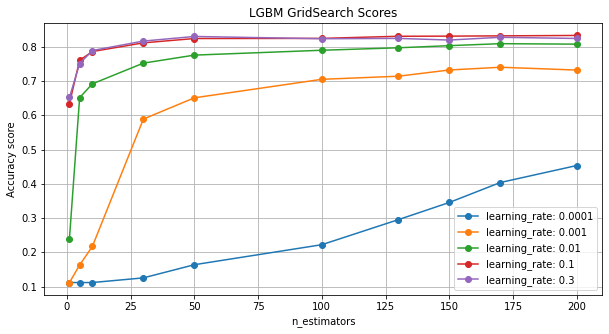

In [20]:
plot_grid_search(grid, 
                 parameters['n_estimators'], 
                 parameters['learning_rate'], 
                 'n_estimators', 
                 'learning_rate')

In [31]:
learning_rate = 0.0001
n_estimators = 50

Непосредственно сравнение моделей: (на всей выборке)

In [32]:
from time import time

def make_tests(x_train, y_train, x_test, y_test):
    """
    Сравнение моделей из 2 задания.
    Параметры: 
        x_train, y_train, x_test, y_test - входные данные
        
    Результат:
        pd.dataFrame cо временем и качеством каждой модели.
    """
    tests = []
    names = ['svm_linear', 'svm_kernel', 'lgbm']
    for name in names:
        if name == 'lgbm':
            test_1 = RFFPipeline(classifier=name, use_F=False, learning_rate=learning_rate, 
                                 n_estimators=n_estimators)
        else: 
            test_1 = RFFPipeline(classifier=name, use_PCA=False, use_F=False)
        test_2 = RFFPipeline(classifier=name)
        tests.append((name, test_1, test_2))

    res = pd.DataFrame(columns=['classifier', 'mode', 'accuracy', 'time, sec'])

    i = 0
    for test in tests:
        for clf in test[1:]:
            start = time()
            if test[0] == 'lgbm':
                clf.fit(x_train, y_train)
            else:
                clf.fit(x_train[:10000], y_train[:10000])
            times = time() - start
            y_pred = clf.predict(x_test)
            acc = accuracy_score(y_test, y_pred) 
            res.loc[str(i)] = (test[0], ('original', 'random')[i%2], acc, times)
            i += 1
    res.set_index(['classifier', 'mode'], inplace=True)
    return res

In [33]:
make_tests(x_train, y_train, x_test, y_test)

accuracy  time, sec
classifier mode                         
svm_linear original     0.800      7.883
           random       0.814     10.187
svm_kernel original     0.853      6.396
           random       0.849     19.293
lgbm       original     0.779      5.560
           random       0.863     81.779

Что ж. Видно, что для SVM_linear и LGBM генерация случайных признаков дала лучший результат, чем использование на исходных данных. Безусловно, затраченное в первом случае время больше, чем во втором. 
Разительное отличие по времени для бустинга кроется в том, что сравнивали мы не бустинг на исходныхх данных с бустингом на сгенерированных, а между бустингом после PCA и бустингом после PCA и преобразования Фурьера. И столь большое время - следствие сравнения алгоритма на new_dim признаках (50) и на n_fetures признаках (1000).
Результат позволяет убедиться в эффективности новой парадигмы с генерацией признаков. 

Однако для ядрового SVM собственная функция не обошла по качеству SVM на оригинальных данных. Это говорит о том, что собственная реализация не на 100% аппроксимирует ядро. Хотя это и не удивительно, мы ведь только приближаем к нему. И в нашем случае, с таким незначительны отличием в качестве, можно сказать, что цель достигнута.

__Задание 3. (2 балла)__

Проведите эксперименты **(1.5 балла)**, после которых вы сможете ответить на следующие вопросы **(0.5 балла)**:
1. Помогает ли предварительное понижение размерности с помощью PCA? 
2. Как зависит итоговое качество от n_features? Выходит ли оно на плато при росте n_features?
3. Важно ли, какую модель обучать — логистическую регрессию или SVM?

**Замечания:**
* В п.2 необходимо перебрать хотя бы 30 значений признаков по разумной сетке, затрагивающей значение в 3000 признаков (или максимальное из того, что позволяет ваш компьтер за разумное время). **За меньшее число признаков и меньшее максимальное значение будут сниматься баллы**
* В п.2 используйте логистическую регрессию
* В п.2 отобразите качества (accuracy_score) на обучении и на тесте в виде графиков на одном полотне. **За отсутствие будут сниматься баллы**
* Везде делайте замеры по времени и результаты включайте в выводы. **За отсутствие будут сниматься баллы**

Разберемся с предварительным понижением размерности. Так как запустить один раз без PCA и один с PCA - непоказательно, то отдадим сравнение gridsearch c внутренней валидацией с 5 фолдами. Это поможет получать какую-никакую зависимость качества от присутствия PCA.

In [41]:
indices = np.random.randint(x_train.shape[0], size=10000)
sub_x_train = x_train[indices]
sub_y_train = y_train[indices]

indices = np.random.randint(x_test.shape[0], size=1000)
sub_x_test = x_test[indices]
sub_y_test = y_test[indices]

In [42]:
%%time

parameters = {'use_PCA': (False, True)}

clf = RFFPipeline()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', 
                    return_train_score=True, n_jobs=-1, verbose=3)
grid.fit(sub_x_train, sub_y_train)
use_PCA = grid.best_params_['use_PCA']
print(f'best score with use_PCA: {use_PCA}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
best score with use_PCA: True
CPU times: user 5.62 s, sys: 7.79 s, total: 13.4 s
Wall time: 14.8 s


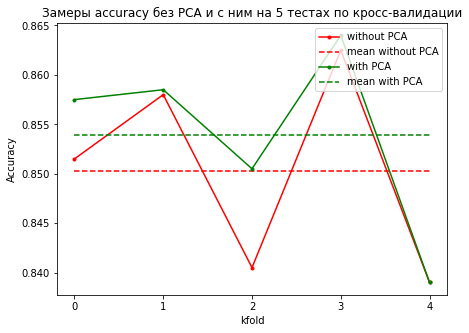

In [43]:
kfold = range(5)
score = np.empty((6, 2))

for k in kfold:
    score[k] = grid.cv_results_[f'split{k}_test_score']
score[5] = grid.cv_results_['mean_test_score']
fig = plt.figure(figsize=(7, 5))
plt.plot(kfold, score[:5,0], marker='.', color='red', label='without PCA')
plt.plot(kfold, score[5][0]*np.ones(5), '--', color='red', label='mean without PCA')
plt.plot(kfold, score[:5,1], marker='.',  color='green', label='with PCA')
plt.plot(kfold, score[5][1]*np.ones(5), '--', color='green', label='mean with PCA')

plt.legend(loc='upper right')
plt.xlabel('kfold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(5, step=1))
plt.title('Замеры accuracy без PCA и с ним на 5 тестах по кросс-валидации')
plt.show()

Как видно, PCA вносит существенный вклад в качество (средняя зеленая линия качества с PCA выше красной - качества без PCA).

Теперь проверка зависимости от n_features:

In [44]:
%%time
n_features = np.arange(1, 1+30*100, 100)
accuracy_train = []
accuracy_test = []

for n in n_features:
    clf = RFFPipeline(n_features=n)
    clf.fit(sub_x_train, sub_y_train)
    y_pred = clf.predict(sub_x_train)
    accuracy_train.append(accuracy_score(sub_y_train, y_pred))
    y_pred = clf.predict(sub_x_test)
    accuracy_test.append(accuracy_score(sub_y_test, y_pred))

CPU times: user 4min 27s, sys: 6min 6s, total: 10min 34s
Wall time: 3min 2s


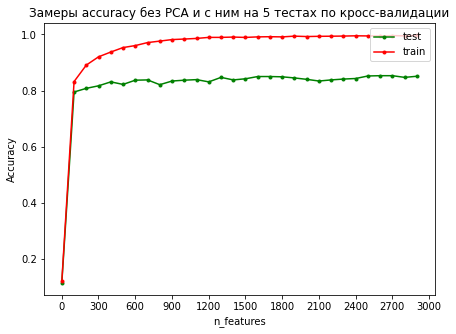

In [45]:
fig = plt.figure(figsize=(7, 5))
plt.plot(n_features, accuracy_test, marker='.', color='green', label='test')
plt.plot(n_features, accuracy_train, marker='.', color='red', label='train')

plt.legend(loc='upper right')
plt.xlabel('n_features')
plt.ylabel('Accuracy')
plt.xticks(np.arange(3001, step=300))
plt.title('Замеры accuracy без PCA и с ним на 5 тестах по кросс-валидации')
plt.show()

Действительно, скор выходит на плато. Почему? Потому что количество деревьев у нас 50. Стало быть как только n_features превышает 50, деревья просто запоминают данные. Это и отражается на качестве по обучению, ставшим 1. Классический overfit.

И последний пункт: выбор линейной модели.

In [ ]:
%%time

parameters = {'classifier': ('logreg', 'svm_linear')}

clf = RFFPipeline()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', 
                    return_train_score=True, n_jobs=-1, verbose=3)
grid.fit(sub_x_train, sub_y_train)
classifier = grid.best_params_['classifier']
print(f'best classifier: {classifier}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


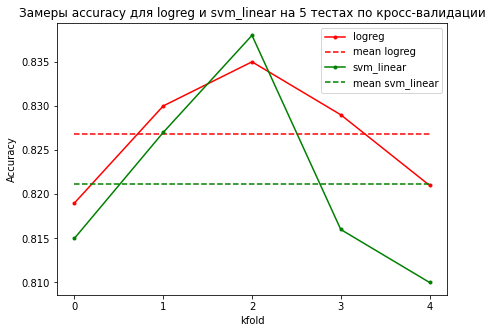

In [39]:
kfold = range(5)
score = np.empty((6, 2))

for k in kfold:
    score[k] = grid.cv_results_[f'split{k}_test_score']
score[5] = grid.cv_results_['mean_test_score']
fig = plt.figure(figsize=(7, 5))
plt.plot(kfold, score[:5,0], marker='.', color='red', label='logreg')
plt.plot(kfold, score[5][0]*np.ones(5), '--', color='red', label='mean logreg')
plt.plot(kfold, score[:5,1], marker='.',  color='green', label='svm_linear')
plt.plot(kfold, score[5][1]*np.ones(5), '--', color='green', label='mean svm_linear')

plt.legend(loc='upper right')
plt.xlabel('kfold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(5, step=1))
plt.title('Замеры accuracy для logreg и svm_linear на 5 тестах по кросс-валидации')
plt.show()

Как видно, логичстическая регрессия ведет себя лучше по сравнению с SVM. 

### Бонус

__Задание 4. (Максимум 2 балла)__

Многие алгоритмы машинного обучения работают лучше, если признаки данных некоррелированы. Оказывается, что для RFF существует модификация, позволяющая получать ортогональные случайные признаки (Orthogonal Random Features, ORF). Об этом методе можно прочитать в [статье](https://proceedings.neurips.cc/paper/2016/file/53adaf494dc89ef7196d73636eb2451b-Paper.pdf). Реализуйте класс для вычисления ORF по аналогии с основным заданием. Обратите внимание, что ваш класс должен уметь работать со случаем n_features > new_dim (в статье есть замечание на этот счет). Проведите эксперименты, сравнивающие RFF и ORF, сделайте выводы.

**Замечание:**
* Сравнения делайте как по времени, так и по качеству.
* Можно сравнивать качество двух методов на разном числе признаков, в таком случае очень полезным будет график зависимости качества от числа признаков

In [40]:
# Your code here: (￣▽￣)/♫•*¨*•.¸¸♪

__Задание 5. (Максимум 2 балла)__

Поэкспериментируйте с функциями для вычисления новых случайных признаков. Не обязательно использовать косинус от скалярного произведения — можно брать знак от него, хэш и т.д. Придумайте побольше вариантов для генерации признаков и проверьте, не получается ли с их помощью добиваться более высокого качества. Также можете попробовать другой классификатор поверх случайных признаков, сравните результаты.

**Замечание:**
* Сравнения делайте как по времени, так и по качеству.